#####     <h3><center>**Task_3 :  To Explore Unsupervised machine Learning**</center></h3> 

######  Import the Libraries

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sn

%matplotlib inline



##### Load the data 

In [66]:
df=pd.read_csv("file:///C:/Users/bhavna/Downloads/Iris.csv")
print("Data Loaded Successfully")



Data Loaded Successfully


#####  Data Visualization 

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


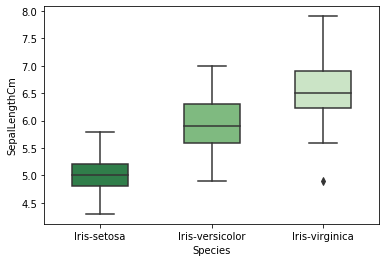

In [96]:
sn.boxplot(y="SepalLengthCm",x="Species",data=df,width=0.5,palette="Greens_r")
plt.show()

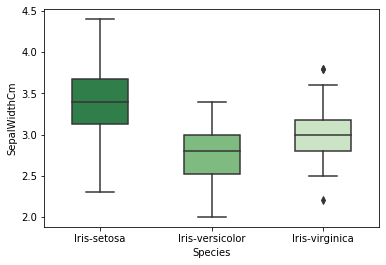

In [97]:
sn.boxplot(y="SepalWidthCm",x="Species",data=df,width=0.5,palette="Greens_r")
plt.show()

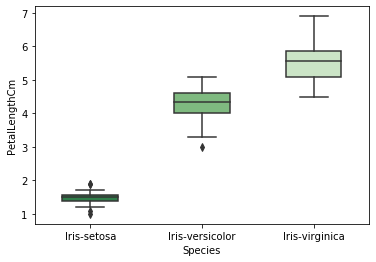

In [98]:
sn.boxplot(y="PetalLengthCm",x="Species",data=df,width=0.5,palette="Greens_r")
plt.show()

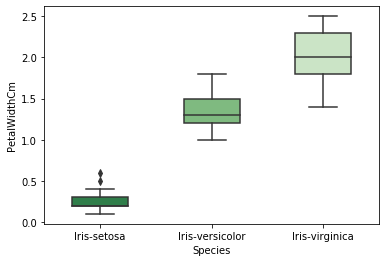

In [83]:
sns.boxplot(y="PetalWidthCm",x="Species",data=df,width=0.5,palette="Greens_r")
plt.show()

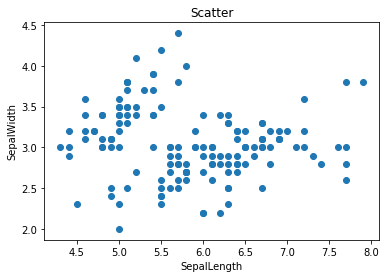

In [86]:
# plot between SepalLengthCm and SepalWidthCm
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.title("Scatter")
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

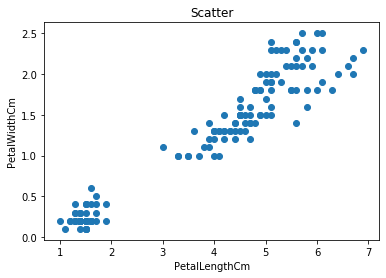

In [87]:
#plot between PetalLengthCm and PetalWidthCm
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.title("Scatter")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

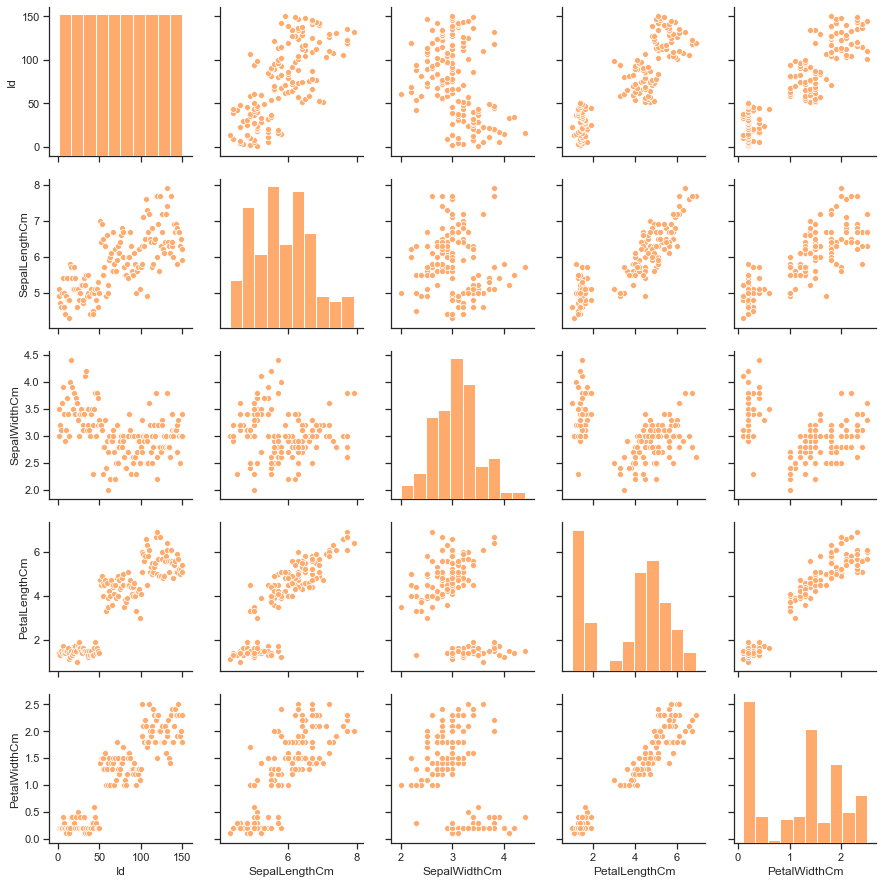

In [108]:

sns.set(style="ticks",palette="copper_r")
g = sns.pairplot(df)

##### How do you find the optimum number of clusters for K Means


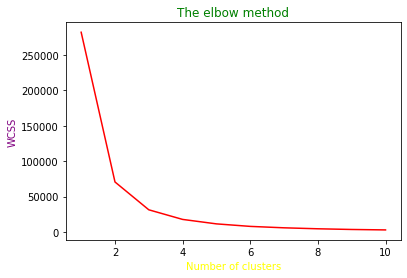

In [58]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values
WCSS = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    WCSS.append(km.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'

plt.plot(range(1, 11), WCSS,color="Red")
plt.title('The elbow method',color="green")
plt.xlabel('Number of clusters',color="Yellow")
plt.ylabel('WCSS',color="purple")                                              # Within cluster sum of squares
plt.show()


###### <h5 align="Right"> From this we choose the number of clusters as 3</h5>

In [39]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
y_predict=km.fit_predict( df.iloc[:, [0, 1, 2, 3]].values)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#####  Clusters Visualization

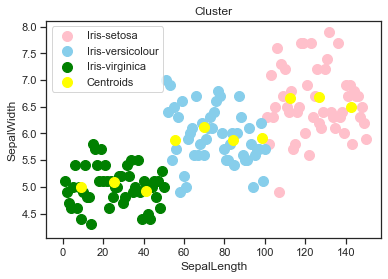

In [110]:
# Visualising the clusters - On the Basis of SepalLengthCm and SepalWidthCm
plt.scatter(x[y_predict== 0, 0], x[y_predict== 0, 1], 
            s = 100, c = 'Pink', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict== 1, 1], 
            s = 100, c = 'SkyBlue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title("Cluster")
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')


plt.show()

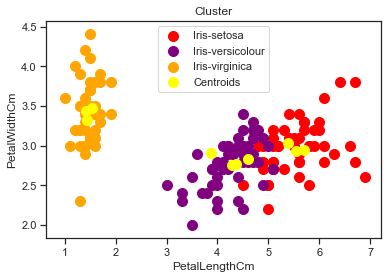

In [109]:
# Visualising the clusters - On the PetalWidthCm and PetalLengthCm
plt.scatter(x[y_predict== 0, 3], x[y_predict== 0, 2], 
            s = 100, c = 'Red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 3], x[y_predict== 1, 2], 
            s = 100, c = 'Purple', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 3], x[y_predict == 2, 2],
            s = 100, c = 'Orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 3], km.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("Cluster")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()


######                <h6 align="Right">By Bhavna Gupta</h6> 